total residual:  0.0
time:  0.0
____


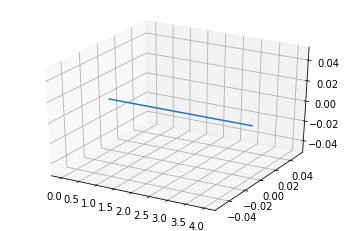

total residual:  1500000.0
total residual:  4014181563.912872
total residual:  1016673113.0168189
total residual:  302391116.78625995
total residual:  12596234.568224529
total residual:  66469184.73828836
total residual:  3012873.4166825577
total residual:  6194141.155692641
total residual:  490802.27588193247
total residual:  3427063.0692846477
total residual:  71538.61665313407
total residual:  1604302.47126013
total residual:  3805.8571757210275
total residual:  34313.86923939771
total residual:  2.1201617190477626
total residual:  0.007633820304943134
total residual:  4.372447824209173e-05
time:  0.004
____


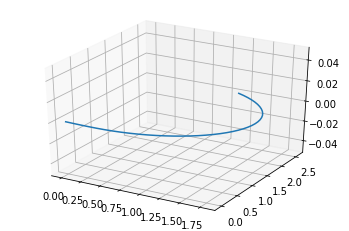

total residual:  1500000.000000086
total residual:  4147974733.304722
total residual:  1050464077.7145271
total residual:  307807467.0621738
total residual:  14279989.893891258
total residual:  67097982.01405086
total residual:  3917114.8122908245
total residual:  6430420.864201363
total residual:  678653.5866278666
total residual:  3624942.7923005708
total residual:  96043.54289997912
total residual:  1744707.7474020717
total residual:  4482.312238783279
total residual:  38897.62650151499
total residual:  2.5395991411087517
total residual:  0.010043916588659047
total residual:  4.5983784820838976e-05
time:  0.008
____


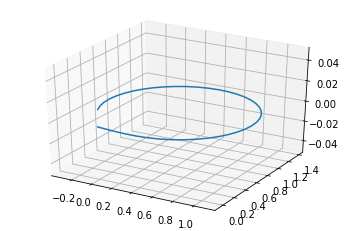

In [16]:
from cr_beam_3D import beam_element,system
import numpy as np

elements = []
E,A,I = 210000000000.0,0.01,1e-5
G = E/(2.0*(1+0.29))
dx = 0.1
for i in range(40):
    elements.append(beam_element(E,G,I,I,I,A,np.array([[dx*i,0.0,0.0],[dx*(i+1),0.0,0.0]]),[i,i+1]))

sys = system(elements)
# fixed_ids = [0,1,2,3,4,5]
fixed_ids = [0,1,2,37,38,39]
toll_e = 1e-4

dof_load_1 = 245

res = np.zeros(sys.max_dof_id)
disp = np.zeros(sys.max_dof_id)
f_ext = np.zeros(sys.max_dof_id)
res_absolut = 1.0


t = 0.0
t_end = 0.008
dt = 0.004

while t<=t_end:

    f_ext[dof_load_1] = 25000*t*1500
    res_absolut = 1.0

    while res_absolut>=toll_e:
        K,F = sys.apply_dirichlet_condition(fixed_ids)
        res = F-f_ext
        du = -1.0*np.linalg.solve(K,res)
        disp = du+disp
        sys.update_elements(disp)
        res_absolut=np.linalg.norm(res)
        print('total residual: ',res_absolut)


    print('time: ',t)
    print('____')


    t+=dt

    sys.plot_system()

total residual:  0.0
time:  0.0
____


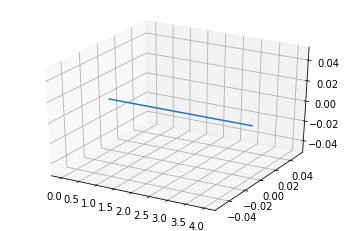

total residual:  150000.0
total residual:  85316150.39339648
total residual:  827313.8595434339
total residual:  465.84530930098737
total residual:  2.3391739436394325
total residual:  5.174837533929058e-05
time:  0.004
____


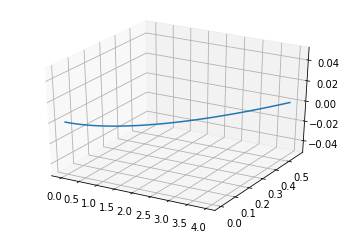

total residual:  150000.00000009796
total residual:  85341789.3933141
total residual:  827563.7073102487
total residual:  466.34114831906834
total residual:  2.3409696627840133
total residual:  4.3360992137674545e-05
time:  0.008
____


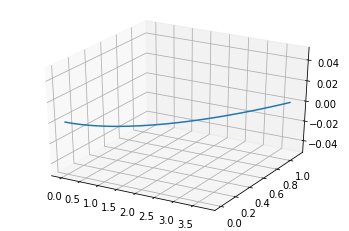

In [6]:
from cr_beam_3D import beam_element,system
import numpy as np

elements = []
E,A,I = 210000000000.0,0.01,1e-5
G = E/(2.0*(1+0.29))
dx = 0.1
for i in range(40):
    elements.append(beam_element(E,G,I,I,I,A,np.array([[dx*i,0.0,0.0],[dx*(i+1),0.0,0.0]]),[i,i+1]))

sys = system(elements)
fixed_ids = [0,1,2,3,4,5]
# fixed_ids = [0,1,2,37,38,39]
toll_e = 1e-4

dof_load_1 = 245

res = np.zeros(sys.max_dof_id)
disp = np.zeros(sys.max_dof_id)
f_ext = np.zeros(sys.max_dof_id)
res_absolut = 1.0


t = 0.0
t_end = 0.008
dt = 0.004

while t<=t_end:

    f_ext[dof_load_1] = 25000*t*1500
    res_absolut = 1.0

    while res_absolut>=toll_e:
        K,F = sys.apply_dirichlet_condition(fixed_ids)
        res = F-f_ext
        du = -1.0*np.linalg.solve(K,res)
        disp = du+disp
        sys.update_elements(disp)
        res_absolut=np.linalg.norm(res)
        print('total residual: ',res_absolut)


    print('time: ',t)
    print('____')


    t+=dt

    sys.plot_system()